### WORLD TOURISM RANKINGS 2018 & 2019 (WITH WEB SCRAPED DATA)

### CONTENTS
- [x] Introduction
- [x] Libraries imports 
- [x] Data scraping from website 
- [x] Data manipulation
- [x] Data visualization
- [x] Conclusion and Findings

### INTRODUCTION

Tourism is the act and process of spending time away from home in pursuit of recreation, relaxation, and pleasure, while making use of the commercial provision of services. The World Tourism rankings are compiled by the United Nations World Tourism Organization as part of their World Tourism Barometer publication, which is released up to six times per year. In this project, destinations are ranked by the number of international visitor arrivals, by the revenue generated by inbound tourism, and by the expenditure of outbound travelers.


#### ABOUT THE DATA

This data was scraped from https://en.wikipedia.org/wiki/World_Tourism_rankings using BeautifulSoup. The data shows the tourism ranking by each country in year 2018 and 2019. The data shows the most visited destinations by international tourist arrivals, international tourism receipts for the top 10 earning countries from tourism, international tourism expenditure for the top ten spenders in international tourism. The data is original but lack some few data which I expect to be updated on their website soon. The data was compiled by the United Nations World Tourism Organization as part of their World Tourism Barometer publication.


You can view the original dataset (original source) by checking this link https://www.e-unwto.org/doi/epdf/10.18111/wtobarometereng.2020.18.1.7?role=tab

#### WHAT I WILL BE VISUALIZING AND GETTING INSIGHTS ON

I will get insights from this data through manipulation and visualization. What I will be visualizing and getting insights on will be;
* Top ten most visited destinations in the world by international tourist arrivals 2018 and 2019
* Top ten tourism earners in the world for the year 2018 and 2019
* Top ten spenders on international tourism for the year 2018 and 2019

In [1]:
# I will cover the following chart types:
# • Barplot
# • Plot Charts
# • Pie Chart

#### IMPORTING THE LIBRARIES

In [2]:
# Libraries I will be using for my manipulation and visualization
from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests  # this module helps in downloading a web page
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### SCRAPING THE DATA FROM THE WEB PAGE

In [3]:
#The below url contains html tables with data about world tourism rankings.
url = "https://en.wikipedia.org/wiki/World_Tourism_rankings"

Before I proceed to scrape my data, I will  first need to examine the contents, and the way the data is organized on the website. After that I use a `request.get().test` to download the contents of the webpage in text format and store in a variable called data before creating a soup object.

In [4]:
data  = requests.get(url).text

I then create a `BeautifulSoup object` using the BeautifulSoup constructor

In [5]:
soup = BeautifulSoup(data,"html.parser")  # creating a soup object using the variable 'data'

I use `find_all()` method to find all html tables in the web page

In [6]:
# find all html tables in the web page
tables = soup.find_all('table') # in html table is represented by the tag <table>

# I can use len(tables) to check for how many tables are present on the entire web page

In [7]:
len(tables)

21

Then I use the pandas function `read_html` and give it the string version of the table as well as the flavor which is the parsing engine bs4.

#### DATA MANIPULATION AND  VISUALIZATION

The function `read_html` always returns a list of DataFrames so I will pick the one I want out of the list.

1. TOP 10 MOST VISITED DESTINATIONS BY INTERNATIONAL TOURIST ARRIVALS

In [8]:
# Data showing the top 10 most visited destinations by International Tourist Arrivals
world_tourism_data_read_html = pd.read_html(str(tables[0]), flavor='bs4')[0]

world_tourism_data_read_html

,Rank,Destination,International tourist arrivals (2019)[1],International tourist arrivals (2018)[1],Change (2018 to 2019) (%),Change (2017 to 2018) (%)
0,1,France,–,89.4 million,-,2.9
1,2,Spain,83.5 million,82.8 million,0.8,1.1
2,3,United States,79.3 million,79.7 million,0.6,3.3
3,4,China,65.7 million,62.9 million,4.5,3.6
4,5,Italy,64.5 million,61.6 million,4.8,5.7
5,6,Turkey,51.2 million,45.8 million,11.9,21.7
6,7,Mexico,45.0 million,41.3 million,9.0,5.1
7,8,Thailand,39.8 million,38.2 million,4.3,7.3
8,9,Germany,39.6 million,38.9 million,1.8,3.8
9,10,United Kingdom,39.4 million,38.7 million,1.9,2.2


I would rename the column names for a clearer column name. 
- [x] Note that France had missing values in the year 2019 which may have little effect on my finding for that particular country and year.
- [x] The missing values was orriginally from the data that was scraped
- [x] The original source of the data which is from the `UNWTO World Tourism Barometer and Statistical Annex, December 2020|World Tourism Organization` recorded no value for France in 2019. This is the link to the original source https://www.e-unwto.org/doi/epdf/10.18111/wtobarometereng.2020.18.1.7?role=tab

In [9]:
# Rename the column names for a clearer column name 
data = world_tourism_data_read_html
data.columns = ['Rank',	'Destination', 'International tourist arrivals 2019 (Million)', 'International tourist arrivals 2018 (Million)', 'Change 2018 to 2019 %', 'Change 2017 to 2018 %']
data

,Rank,Destination,International tourist arrivals 2019 (Million),International tourist arrivals 2018 (Million),Change 2018 to 2019 %,Change 2017 to 2018 %
0,1,France,–,89.4 million,-,2.9
1,2,Spain,83.5 million,82.8 million,0.8,1.1
2,3,United States,79.3 million,79.7 million,0.6,3.3
3,4,China,65.7 million,62.9 million,4.5,3.6
4,5,Italy,64.5 million,61.6 million,4.8,5.7
5,6,Turkey,51.2 million,45.8 million,11.9,21.7
6,7,Mexico,45.0 million,41.3 million,9.0,5.1
7,8,Thailand,39.8 million,38.2 million,4.3,7.3
8,9,Germany,39.6 million,38.9 million,1.8,3.8
9,10,United Kingdom,39.4 million,38.7 million,1.9,2.2


The string values in some of the rows needs to be updated to only numerical values using the `iloc` funtion, because our visualization libraries may not be able to read some string values when visualizing our data, so we have to update it to numerical values only. And for the `Change column` some values are supposed to be negative values because of the drop in change within that year. The original data set which can be viewed from https://www.e-unwto.org/doi/epdf/10.18111/wtobarometereng.2020.18.1.7?role=tab shows the negative values of some changes in the year which is represented with a negative `sign (-)` or can seen in a `red downward arrow` from the website I scrapped my data from
- [x] The missing values for France in 2019 will be replaced with zero (0) so that it won't affect our visualization .
- [x] I will be inputting the negative signs to some values in the `Change column` due to their drop in change within the year as can be seen on the original dataset or seen with a red downward arrow from the website I scraped the data from
- [x] This negative values will help later on my visualization to show which countries dropped through the year.

In [10]:
# Updating values in our rows using iloc
data.iloc[[0,1,2,3,4,5,6,7,8,9], [3]] = 89.4,82.8,79.7,62.9,61.6,45.8,41.3,38.2,38.9,38.7
data.iloc[[0,1,2,3,4,5,6,7,8,9], [2]] = 0,83.5,79.3,65.7,64.5,51.2,45.0,39.8,39.6,39.4
data.iloc[[0,1,2,3,4,5,6,7,8,9], [4]]=0,0.8,-0.6,4.5,4.8,11.9,9.0,4.3,1.8,1.9
data.iloc[[0,1,2,3,4,5,6,7,8,9], [5]]=2.9,1.1,3.3,3.6,5.7,21.7,5.1,7.3,3.8,-2.2
data

,Rank,Destination,International tourist arrivals 2019 (Million),International tourist arrivals 2018 (Million),Change 2018 to 2019 %,Change 2017 to 2018 %
0,1,France,0,89.4,0,2.9
1,2,Spain,83.5,82.8,0.8,1.1
2,3,United States,79.3,79.7,-0.6,3.3
3,4,China,65.7,62.9,4.5,3.6
4,5,Italy,64.5,61.6,4.8,5.7
5,6,Turkey,51.2,45.8,11.9,21.7
6,7,Mexico,45.0,41.3,9.0,5.1
7,8,Thailand,39.8,38.2,4.3,7.3
8,9,Germany,39.6,38.9,1.8,3.8
9,10,United Kingdom,39.4,38.7,1.9,-2.2


I would use seaborn to plot a barplot showing the top 10 most visited destinations in the world by international tourists in 2018 and 2019. Note that for year 2019 France had no values from the dataset, originally scraped from the web page and as also seen in the main dataset page https://www.e-unwto.org/doi/epdf/10.18111/wtobarometereng.2020.18.1.7?role=tab

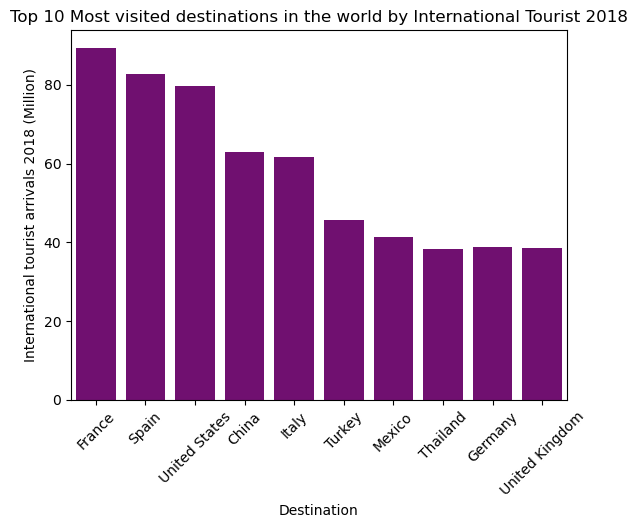

In [11]:
# plotting a barplot using seaborn to show the top 10 most visited destinations in the world by international tourists 2018
color = ['purple']
ax = sns.barplot(x='Destination', y='International tourist arrivals 2018 (Million)', data=data, palette=color)
ax.set_title("Top 10 Most visited destinations in the world by International Tourist 2018")
plt.xticks(rotation=45);

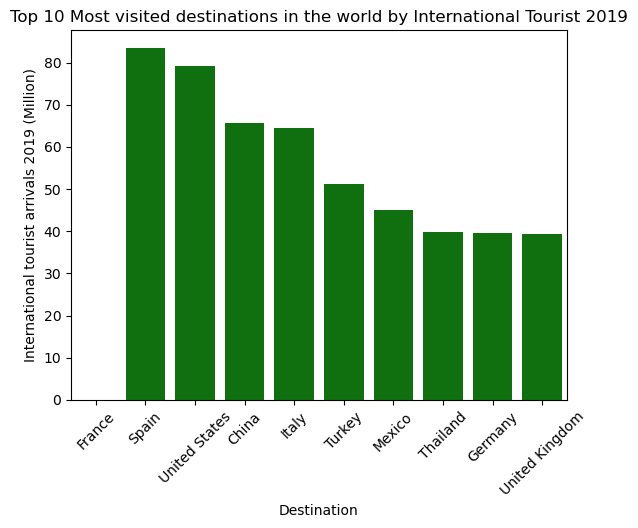

In [12]:
# plotting a barplot using seaborn to show the top 10 most visited destinations in the world by international tourists 2019
color = ['green']
ax = sns.barplot(x='Destination', y='International tourist arrivals 2019 (Million)', data=data, palette=color)
ax.set_title("Top 10 Most visited destinations in the world by International Tourist 2019")
plt.xticks(rotation=45);

Using a plot chart to show changes in top 10 world most visited destinations from 2017 to 2018 and 2018 to 2019

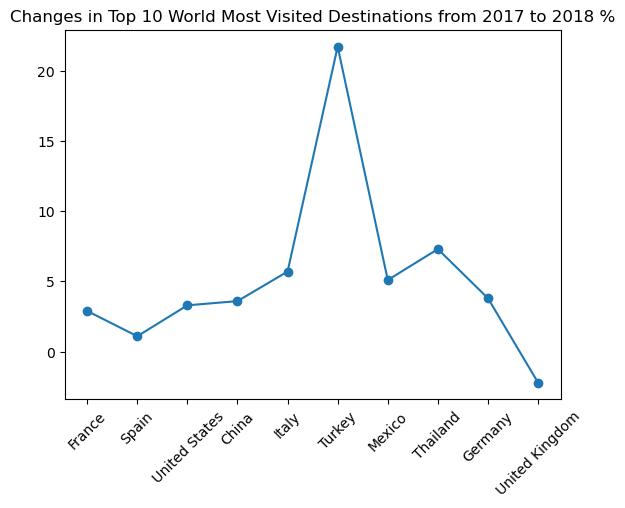

In [13]:
# Change (2017 to 2018)
xpoints = np.array(['France','Spain',' United States', 'China', 'Italy', 'Turkey', 'Mexico', 'Thailand', 'Germany', 'United Kingdom'])
ypoints = np.array(data['Change 2017 to 2018 %'])

plt.plot(xpoints, ypoints, marker = 'o')
plt.title("Changes in Top 10 World Most Visited Destinations from 2017 to 2018 %")
plt.xticks(rotation=45);
plt.show()

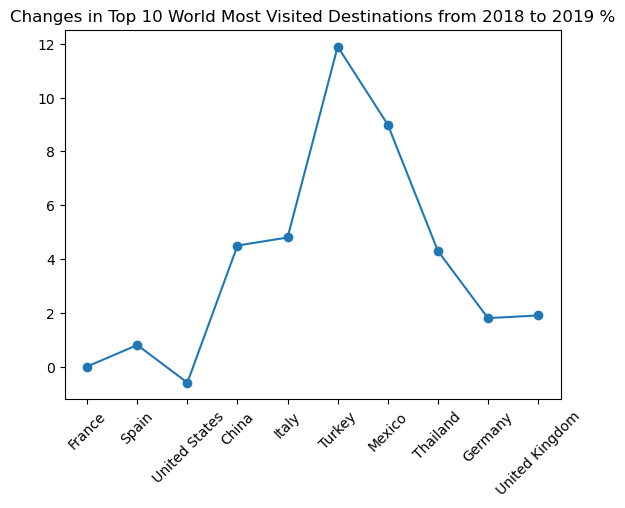

In [14]:
# Change (2018 to 2019)
xpoints = np.array(['France','Spain',' United States', 'China', 'Italy', 'Turkey', 'Mexico', 'Thailand', 'Germany', 'United Kingdom'])
ypoints = np.array(data['Change 2018 to 2019 %'])

plt.plot(xpoints, ypoints, marker = 'o')
plt.title("Changes in Top 10 World Most Visited Destinations from 2018 to 2019 %")
plt.xticks(rotation=45);
plt.show()

I would calculate the total sum of all international tourist arrivals for the top 10 most visited destinations in the world in 2018 and 2019.

In [15]:
# Total sum of all international tourist arrivals for the top 10 most visited destinations in the world in 2018
Total = (data['International tourist arrivals 2018 (Million)'])
sum(Total)

579.3000000000001

In [16]:
# Total sum of all international tourist arrivals for the top 10 most visited destinations in the world in 2018
Total = (data['International tourist arrivals 2019 (Million)'])
sum(Total)

508.0

#### Findings from the most visited destinations in the world by international tourist arrivals 2018 and 2019
* France was the most visited destination in 2018 with 89.4 million international tourist arrivals.
* Spain was the most visited destination in 2019 with 83.5 million international tourist arrivals.
* There was a large increase in tourist visitation in Turkey in year 2018 and 2019 with 21.7% and 11.9% change each.
* There was a drop in change for international tourist visitation to the United States from 2018 to 2019 with -0.6% drop in change.
* There was also drop in change for international tourist visitation to the United Kingdom from 2017 to 2018 with -2.2% drop in change
* Mexico also had a large increase in change for tourist visitation in year 2019 with over 9.0% change.
* Spain, China, Italy, Thailand, Germany, United Kingdom all had increase in international tourist visitation in from 2018 to 2019.
* The top ten most visited destinations in the world had a total of 579.3 million international tourist arrivals in 2018.
* The top ten most visited destinations in the world had a total of 508.0 million international tourist arrivals in 2019.

2. TOP 10 TOURISM EARNERS IN THE WORLD FOR THE YEAR 2018 AND 2019

I will be using the International tourism receipts to give insights on the top 10 tourism earners  in the world for the year 2018 and 2019.

In [17]:
# Data for the International tourism receipts used in showing the top 10 tourism earners in the world
top_10_read_html = pd.read_html(str(tables[6]), flavor='bs4')[0]

top_10_read_html

,Rank,Region,Internationaltourismreceipts (US$ billion)(2019)[1],International tourism receipts (US$ billion)(2018)[1],Change (local currency) (2018 to 2019) (%)
0,1,United States,214.1,214.7,0.3%
1,2,Spain,79.7,81.7,2.9%
2,3,France,63.8,66.0,1.9%
3,4,Thailand,60.5,56.4,3.2%
4,5,United Kingdom,52.7,50.0,10.1%
5,6,Italy,49.6,49.3,6.2%
6,7,Japan,46.1,42.1,8.0%
7,8,Australia,45.7,45.0,9.1%
8,9,Germany,41.6,43.0,2.2%
9,10,China,40.1,40.4,1.6%


I would also rename the column names for a clearer column name.

In [18]:
# Rename the column names for a clearer column name
data_top_10_earners = top_10_read_html
data_top_10_earners.columns = ['Rank', 'Region', 'International tourism receipts US$ billion 2019', 'International tourism receipts US$ billion 2018', 'Change (local currency) 2018 to 2019 %']
data_top_10_earners

,Rank,Region,International tourism receipts US$ billion 2019,International tourism receipts US$ billion 2018,Change (local currency) 2018 to 2019 %
0,1,United States,214.1,214.7,0.3%
1,2,Spain,79.7,81.7,2.9%
2,3,France,63.8,66.0,1.9%
3,4,Thailand,60.5,56.4,3.2%
4,5,United Kingdom,52.7,50.0,10.1%
5,6,Italy,49.6,49.3,6.2%
6,7,Japan,46.1,42.1,8.0%
7,8,Australia,45.7,45.0,9.1%
8,9,Germany,41.6,43.0,2.2%
9,10,China,40.1,40.4,1.6%


* The values in the `Change (local currency) 2018 to 2019 %` column needs to be updated using the iloc funtion.
* I will also input negative signs to some values in the `Change (local currency) 2018 to 2019 %` column due to their drop in change within the year as can be seen on the original dataset or seen with a `red downward arrow` from the website I scraped the data from

In [19]:
data_top_10_earners.iloc[[0,1,2,3,4,5,6,7,8,9], [4]] = -0.3,2.9,1.9,3.2,10.1,6.2,8.0,9.1,2.2,-1.6
data_top_10_earners

,Rank,Region,International tourism receipts US$ billion 2019,International tourism receipts US$ billion 2018,Change (local currency) 2018 to 2019 %
0,1,United States,214.1,214.7,-0.3
1,2,Spain,79.7,81.7,2.9
2,3,France,63.8,66.0,1.9
3,4,Thailand,60.5,56.4,3.2
4,5,United Kingdom,52.7,50.0,10.1
5,6,Italy,49.6,49.3,6.2
6,7,Japan,46.1,42.1,8.0
7,8,Australia,45.7,45.0,9.1
8,9,Germany,41.6,43.0,2.2
9,10,China,40.1,40.4,-1.6


I would use the pandas bar plot to visualize the top 10 tourism earners in the world for the year 2018 and 2019.

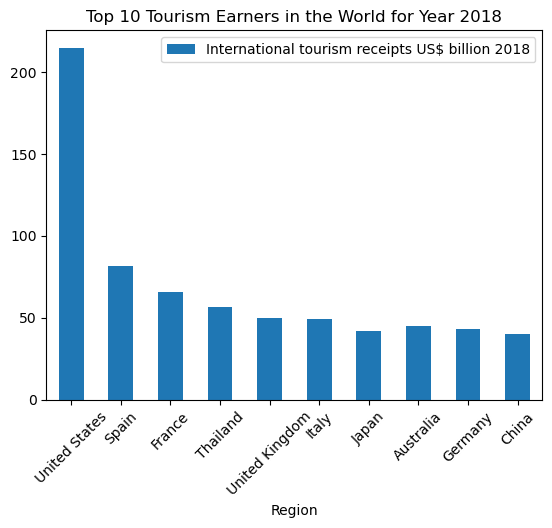

In [20]:
# Pandas bar plot showing top 10 tourism earners in the world for the year 2018
data_top_10_earners.plot.bar(x='Region', y='International tourism receipts US$ billion 2018', rot=90);
plt.title("Top 10 Tourism Earners in the World for Year 2018")
plt.xticks(rotation=45);

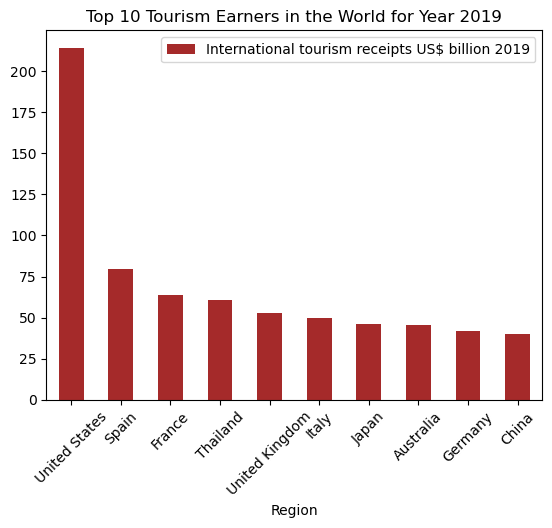

In [21]:
# Pandas bar plot showing top 10 tourism earners in the world for the year 2019.
data_top_10_earners.plot.bar(x='Region', y='International tourism receipts US$ billion 2019', rot=90, color='brown');
plt.title("Top 10 Tourism Earners in the World for Year 2019")
plt.xticks(rotation=45);

I will use a pie chart to show the percentage each country represents when it comes to top 10 earnings in tourism for 2018 and 2019

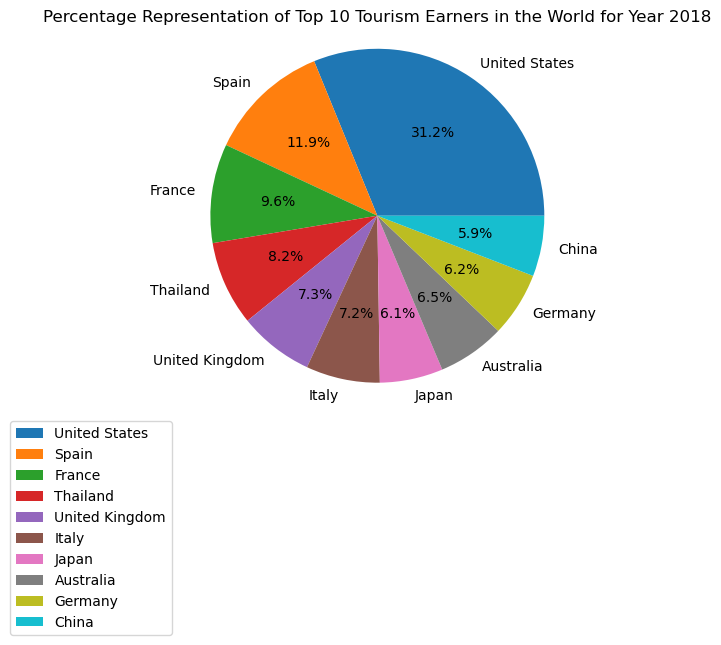

In [22]:
# Using a pie chart to visualize the percentage each country represents in the top 10 earnings in tourism for 2018
my_data = (data_top_10_earners['International tourism receipts US$ billion 2018'])
my_labels = (data_top_10_earners['Region'])
plt.pie(my_data, labels=my_labels, autopct='%1.1f%%')
plt.title('Percentage Representation of Top 10 Tourism Earners in the World for Year 2018')
plt.axis('equal')
plt.legend(my_labels, loc='best', bbox_to_anchor=(0.1, -0.04), ncol=1)
plt.show()

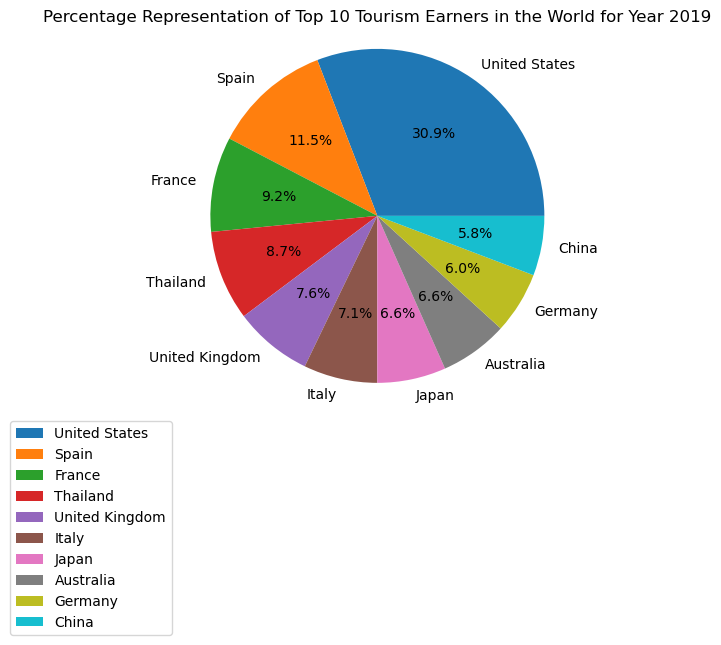

In [23]:
# # Using a pie chart to visualize the percentage each country represents in the top 10 earnings in tourism for 2019
my_data = (data_top_10_earners['International tourism receipts US$ billion 2019'])
my_labels = (data_top_10_earners['Region'])
plt.pie(my_data, labels=my_labels, autopct='%1.1f%%')
plt.title('Percentage Representation of Top 10 Tourism Earners in the World for Year 2019')
plt.axis('equal')
plt.legend(my_labels, loc='best', bbox_to_anchor=(0.1, -0.04), ncol=1)
plt.show()

Using a plot chart to show changes in the top 10 tourism earners from 2018 to 2019

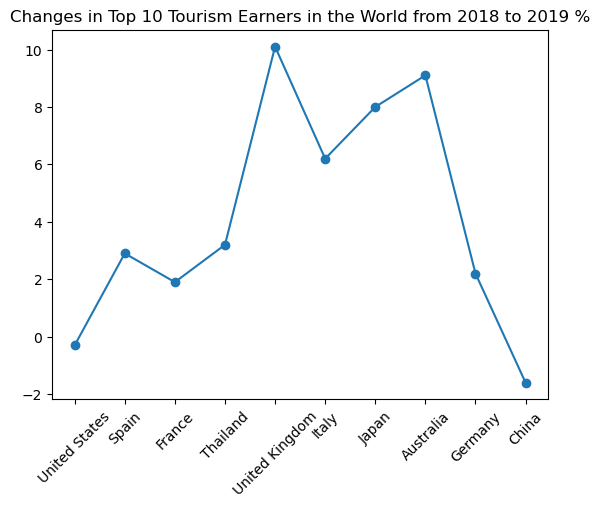

In [24]:
# Changes in top 10 tourism earners in the world from 2018 to 2019
xpoints = np.array(['United States','Spain','France', 'Thailand', 'United Kingdom', 'Italy', 'Japan', 'Australia', 'Germany', 'China'])
ypoints = np.array(data_top_10_earners['Change (local currency) 2018 to 2019 %'])

plt.plot(xpoints, ypoints, marker = 'o')
plt.title("Changes in Top 10 Tourism Earners in the World from 2018 to 2019 %")
plt.xticks(rotation=45);
plt.show()

#### Findings from Top Ten Tourism Earners in the World For the Year 2018 and 2019
* The United States had the highest earnings for both 2018 and 2019
* There was a drop in change by the United States with -0.3% drop from 2018 to 2019
* China had a drop in change of -1.6% drop from 2018 to 2019
* There was large increase in the United Kingdom with about 10.1% increase in change from 2018 to 2019
* Japan and Australia also had good increase with about 8.0% and 9.1% each
* The United States occupied the largest percentage of the top 10 tourism earners spot despite the drop in 2019

3. TOP 10 SPENDERS ON INTERNATIONAL TOURISM FOR THE YEAR 2018 AND 2019

I will be using the international tourism expenditure to give insights on the top 10 spenders on international tourism for the year 2018 and 2019

In [25]:
# Data for international tourism expenditure used in showing the top ten spenders on international tourism for the year 2018 and 2019
top_10_spenders_read_html = pd.read_html(str(tables[12]), flavor='bs4')[0]
top_10_spenders_read_html

,Rank,Country,International tourism expenditure (2019)[1],International tourism expenditure (2018)[1],Change (local currency) (2017 to 2018) (%) [1]
0,1,China,$254.6 billion,$277.3 billion,4.2
1,2,United States,$152.3 billion,$144.5 billion,5.4
2,3,Germany,$93.2 billion,$95.6 billion,2.9
3,4,United Kingdom,$71.9 billion,$70.9 billion,6.0
4,5,France,$51.7 billion,$48.9 billion,11.5
5,6,Russia,$36.2 billion,$34.3 billion,5.5
6,7,Australia,$36.0 billion,$37.0 billion,4.6
7,8,Canada,$35.8 billion,$34.5 billion,6.1
8,9,South Korea,$32.3 billion,$35.1 billion,8.1
9,10,Italy,$30.3 billion,$30.1 billion,6.3


Rename the column names for a clearer column name

In [26]:
# Rename the column names for a clearer column name 
data_top_10_spenders = top_10_spenders_read_html
data_top_10_spenders.columns = ['Rank', 'Country', 'International tourism expenditure US$ billion (2019)', 'International tourism expenditure US$ billion (2018)', 'Change (local currency) (2017 to 2018) (%)']
data_top_10_spenders

,Rank,Country,International tourism expenditure US$ billion (2019),International tourism expenditure US$ billion (2018),Change (local currency) (2017 to 2018) (%)
0,1,China,$254.6 billion,$277.3 billion,4.2
1,2,United States,$152.3 billion,$144.5 billion,5.4
2,3,Germany,$93.2 billion,$95.6 billion,2.9
3,4,United Kingdom,$71.9 billion,$70.9 billion,6.0
4,5,France,$51.7 billion,$48.9 billion,11.5
5,6,Russia,$36.2 billion,$34.3 billion,5.5
6,7,Australia,$36.0 billion,$37.0 billion,4.6
7,8,Canada,$35.8 billion,$34.5 billion,6.1
8,9,South Korea,$32.3 billion,$35.1 billion,8.1
9,10,Italy,$30.3 billion,$30.1 billion,6.3


* Values with strings and special characters will be updated to only numerical values using `iloc` function.
* I will also input negative signs to some values in the `Change (local currency) (2017 to 2018) (%)` column due to their drop in change within the year as can be seen on the original dataset or seen with a `red downward arrow` from the website I scraped the data from

In [27]:
data_top_10_spenders.iloc[[0,1,2,3,4,5,6,7,8,9], [2]] = 254.6,152.3,93.2,71.9,51.7,36.2,36.0,35.8,32.3,30.3
data_top_10_spenders.iloc[[0,1,2,3,4,5,6,7,8,9], [3]] = 277.3,144.5,95.6,70.9,48.9,34.3,37.0,34.5,35.1,30.1
data_top_10_spenders.iloc[[0,1,2,3,4,5,6,7,8,9], [4]] = -4.2,5.4,2.9,6.0,11.5,5.5,4.6,6.1,-8.1,6.3
data_top_10_spenders

,Rank,Country,International tourism expenditure US$ billion (2019),International tourism expenditure US$ billion (2018),Change (local currency) (2017 to 2018) (%)
0,1,China,254.6,277.3,-4.2
1,2,United States,152.3,144.5,5.4
2,3,Germany,93.2,95.6,2.9
3,4,United Kingdom,71.9,70.9,6.0
4,5,France,51.7,48.9,11.5
5,6,Russia,36.2,34.3,5.5
6,7,Australia,36.0,37.0,4.6
7,8,Canada,35.8,34.5,6.1
8,9,South Korea,32.3,35.1,-8.1
9,10,Italy,30.3,30.1,6.3


I would use the pandas bar plot to visualize the top 10 spenders on international tourism for year 2018 and 2019.

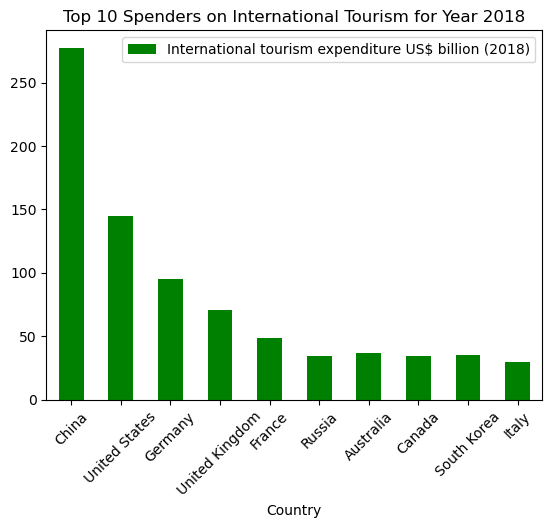

In [28]:
# Pandas bar plot showing top 10 spenders on international tourism for year 2018
data_top_10_spenders.plot.bar(x='Country', y='International tourism expenditure US$ billion (2018)', rot=90, color='green');
plt.title("Top 10 Spenders on International Tourism for Year 2018")
plt.xticks(rotation=45);

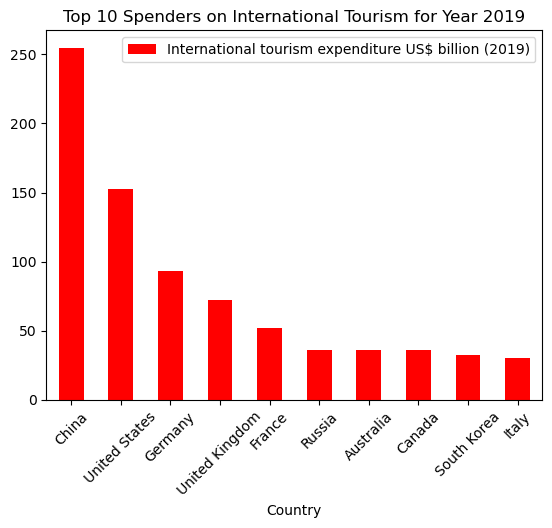

In [29]:
# Pandas bar plot showing top 10 spenders on international tourism for year 2019
data_top_10_spenders.plot.bar(x='Country', y='International tourism expenditure US$ billion (2019)', rot=90, color='red');
plt.title("Top 10 Spenders on International Tourism for Year 2019")
plt.xticks(rotation=45);

Using a plot chart to show changes for top 10 spenders on international tourism from year 2017 to 2018

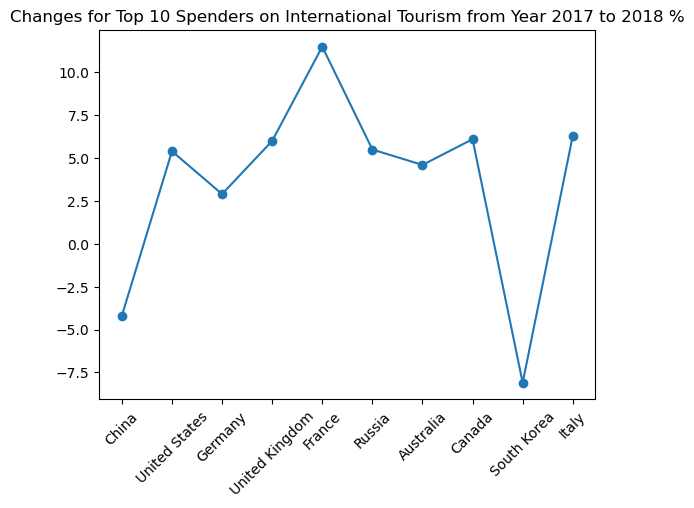

In [30]:
# Showing changes for top 10 spenders on international tourism from year 2017 to 2018
xpoints = np.array(data_top_10_spenders['Country'])
ypoints = np.array(data_top_10_spenders['Change (local currency) (2017 to 2018) (%)'])

plt.plot(xpoints, ypoints, marker = 'o')
plt.title("Changes for Top 10 Spenders on International Tourism from Year 2017 to 2018 %")
plt.xticks(rotation=45);
plt.show()

Using a pie chart to visualize the percentage each country represents in the top 10 spending on international tourism for 2018 and 2019

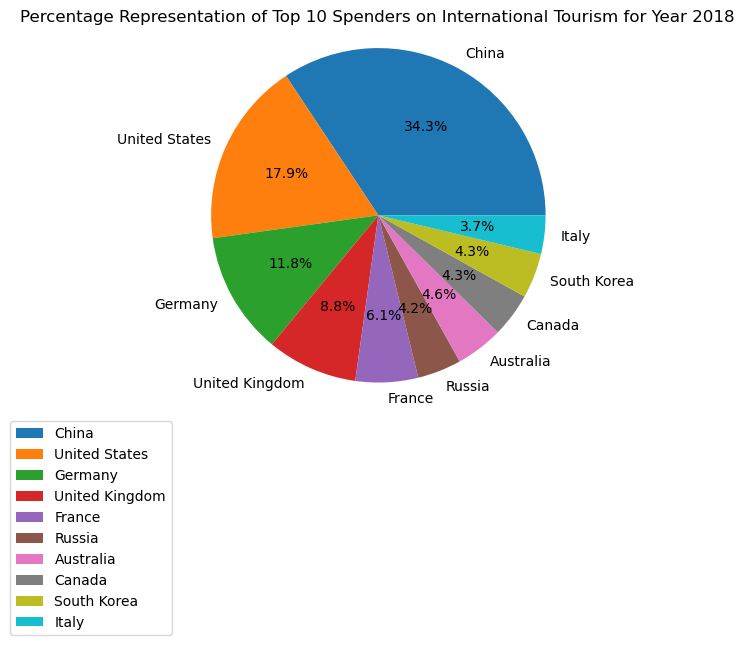

In [31]:
# Using a pie chart to visualize the percentage each country represents in the top 10 spending on international tourism for 2018
my_data = (data_top_10_spenders['International tourism expenditure US$ billion (2018)'])
my_labels = (data_top_10_spenders['Country'])
plt.pie(my_data, labels=my_labels, autopct='%1.1f%%')
plt.title('Percentage Representation of Top 10 Spenders on International Tourism for Year 2018')
plt.axis('equal')
plt.legend(my_labels, loc='best', bbox_to_anchor=(0.1, -0.04), ncol=1)
plt.show()

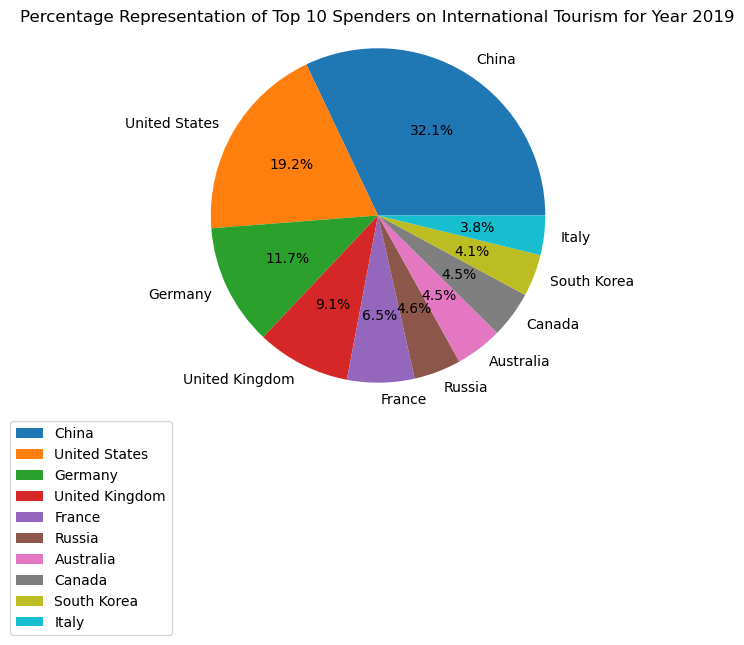

In [32]:
# Using a pie chart to visualize the percentage each country represents in the top 10 spending on international tourism for 2018
my_data = (data_top_10_spenders['International tourism expenditure US$ billion (2019)'])
my_labels = (data_top_10_spenders['Country'])
plt.pie(my_data, labels=my_labels, autopct='%1.1f%%')
plt.title('Percentage Representation of Top 10 Spenders on International Tourism for Year 2019')
plt.axis('equal')
plt.legend(my_labels, loc='best', bbox_to_anchor=(0.1, -0.04), ncol=1)
plt.show()

I would calculate the total sum spent by the top 10 spenders on international tourism for the year 2018 and 2019. This will help me note the total amount spent on tourism by this top 10 spenders. The amount is recorded in billion dollars ($).

In [33]:
# Total sum spent by top 10 spenders on international tourism for the year 2018 (In billion dollars($))
Total = (data_top_10_spenders['International tourism expenditure US$ billion (2018)'])
sum(Total)

808.1999999999999

In [34]:
# Total sum spent by top 10 spenders on international tourism for the year 2019 (In billion dollars($))
Total = (data_top_10_spenders['International tourism expenditure US$ billion (2019)'])
sum(Total)

794.3

#### Findings from Top Ten Spenders on International Tourism For the Year 2018 and 2019
* China where the top spenders on international tourism for the year 2018 and 2019
* China had a fall in change from 2017 to 2018 with -4.2% drop
* South Korea also had a fall in change from 2017 to 2018 with -8.1% drop
* United Kingdom, France and Canada had an increase in change from 2017 to 2018 with 6.0%, 11.5% and 6.1% each
* China had the highest percentaage of spenders on international tourism for both 2018 and 2019
* A total amount of 808.2 billion dollars was spent on international tourism in 2018 by the top 10 spenders
* While in 2019 a total amount of 794.3 billion dollars was spent on international tourism by the top 10 spenders 

#### CONCLUSION AND FINDINGS

Tourism is a social, cultural and economic phenomenon which entails the movement of people to countries or places outside their usual environment for personal or business/professional purposes. In this project I worked on the top ten most visited destinations in the world by international tourist arrivals 2018 and 2019, top ten tourism earners in the world for the year 2018 and 2019 and top ten spenders on international tourism for the year 2018 and 201. I got some great findings from this analysis. And these were the findings I got;

* France was the most visited destination in 2018 with 89.4 million international tourist arrivals.
* Spain was the most visited destination in 2019 with 83.5 million international tourist arrivals.
* There was a large increase in tourist visitation in Turkey in year 2018 and 2019 with 21.7% and 11.9% change each.
* There was a drop in change for international tourist visitation to the United States from 2018 to 2019 with -0.6% drop in change.
* There was also drop in change for international tourist visitation to the United Kingdom from 2017 to 2018 with -2.2% drop in change
* Mexico also had a large increase in change for tourist visitation in year 2019 with over 9.0% change.
* Spain, China, Italy, Thailand, Germany, United Kingdom all had increase in international tourist visitation in from 2018 to 2019.
* The top ten most visited destinations in the world had a total of 579.3 million international tourist arrivals in 2018.
* The top ten most visited destinations in the world had a total of 508.0 million international tourist arrivals in 2019
* The United States had the highest earnings for both 2018 and 2019
* There was a drop in change by the United States with -0.3% drop from 2018 to 2019
* China had a drop in change of -1.6% drop from 2018 to 2019
* There was large increase in the United Kingdom with about 10.1% increase in change from 2018 to 2019
* Japan and Australia also had good increase with about 8.0% and 9.1% each
* The United States occupied the largest percentage of the top 10 tourism earners spot despite the drop in 2019
* China where the top spenders on international tourism for the year 2018 and 2019
* China had a fall in change from 2017 to 2018 with -4.2% drop
* South Korea also had a fall in change from 2017 to 2018 with -8.1% drop
* United Kingdom, France and Canada had an increase in change from 2017 to 2018 with 6.0%, 11.5% and 6.1% each
* China had the highest percentaage of spenders on international tourism for both 2018 and 2019
* A total amount of 808.2 billion dollars was spent on international tourism in 2018 by the top 10 spenders
* While in 2019 a total amount of 794.3 billion dollars was spent on international tourism by the top 10 spenders